<div dir="rtl">
<h4>نام: سارا رضایی منش</h4>
 
<h4>شماره دانشجویی: ۸۱۰۱۹۸۵۷۶</h4>
<h1 style="color: #cf133e; font-weight: 600;">تمرین کامپیوتری شماره سه</h1>
<h3>هدف پروژه: استفاده از داده های آماری برای تمرین دادن هوش مصنوعی برای دسته بندی کردن صحیح داده های جدید با استفاده از naive bayes</h3>
<h5 style="line-height: 20pt;">توضیح کلی پروژه: در این پروژه ابتدا در پیش پردازش داده های خود را نرمالایز کردیم و ایست واژه ها را حذف کردیم. سپس با استفاده از روش های مختلف، داده های تست را طبقه بندی می کنیم. در مرحله بعد میزان درستی این روش ها را در طبقه بندی داده ها مقایسه کرده و آنها را با هم مقایسه می کنیم. با استفاده از نتایج بدست آمده می توان دقت محاسبات را با پیش پردازش های مختلف افزایش داد. به عنوان مثال پس از رسم پلات ها، متوجه می شویم که حذف کلماتی که در همه کلاسها پر تکرار هستند می تواند به دقت محاسبات کمک بکند.</h5>
</div>

<h2 dir="rtl" style="color: #cf133e; font-weight: 600;">فاز اول: پیش پردازش داده ها</h2>
<h4 dir="rtl" style="font-weight: 600;">خواندن فایل ها</h4>

In [401]:
from __future__ import unicode_literals
import pandas as pd
import parsivar
import copy
import hazm
import matplotlib.pyplot as plt

words_dict_train =	{
  'vehicles': [],
  'electronic-devices': [],
  'businesses': [],
  'for-the-home': [],
  'leisure-hobbies': [],
  'personal': []
}

words_dict_test =	{
  'vehicles': [],
  'electronic-devices': [],
  'businesses': [],
  'for-the-home': [],
  'leisure-hobbies': [],
  'personal': []
}

class_count =	{
  'vehicles': 0, 'electronic-devices': 0, 'businesses': 0, 'for-the-home': 0,
  'leisure-hobbies': 0, 'personal': 0, 'sum': 0
}

words_count =	{
  'vehicles': 0, 'electronic-devices': 0, 'businesses': 0, 'for-the-home': 0,
  'leisure-hobbies': 0, 'personal': 0
}

stop_words = set(hazm.stopwords_list("./persian_stopwords.txt"))

train = pd.read_csv('./divar_data/Data/divar_train.csv')
test = pd.read_csv('./divar_data/Data/divar_test.csv')
test_tokenized_title = [[]]*len(test['title'])
test_tokenized_desc = [[]]*len(test['description'])

train.head()

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خ...,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی م...,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal


In [402]:
test.head()

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فر...,leisure-hobbies


<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">Normalizing</h3>
    <h4 style="font-weight: 600;">استفاده از نرمالایزر parsivar از بین بردن کاراکتر های بی اهمیت:</h4>
    <h5 style="line-height: 20pt;">در این مرحله از noramlizer موجود در parsivar استفاده میکنیم که اعداد فارسی را به انگلیسی تبدیل می کند و بین کاراکتر هایی مانند نقطه، ویرگول و... و کلمات کنار آنها فاصله اضافه می کند. نرمالسازی های دیگری نیز با توجه به متن های داده شده انجام شده اند. </h5>
</div>

In [403]:
def normalize_row(txt):
    my_normalizer = parsivar.Normalizer()
    my_normalizer.normalize(txt)
    # txt = txt.replace("فک", "فکر")
    txt = txt.replace("دگ", "دیگر")
    # txt = txt.replace(" برا", " برای")
    # txt = txt.replace("همون", "همان")
    # txt = txt.replace("خونه", "خانه")
    # txt = txt.replace("تون", "تان")
    # txt = txt.replace(" ی ", "")
    # txt = txt.replace(" ب ", " به ")
    txt = txt.replace("\n","")
    txt = txt.replace("\t","")
    # txt = txt.replace( "...","")
    return txt

def normalize(df):
    df['title'] = df['title'].apply(lambda x: normalize_row(x))
    df['description'] = df['description'].apply(lambda x: normalize_row(x))

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">حذف ایست واژه ها و شمردن تعداد کلمات در هر کلاس </h3>
    <h5 style="line-height: 20pt;">در این مرحله ابتدا جمله ها را به کلمات جداگانه تبدیل می کنیم و کلمات بدست آمده را بر اساس نام  کلاس آنها در ستون مربوط به آن کلاس در دیتافریم words ذخیره می کنیم. در مرحله بعد با استفاده از hazm، ایست واژه های زبان فارسی را دریافت کرده و آنها را از کلماتی که داریم حذف می کنیم.</h5>
</div>

In [404]:
def tokenize_row(txt, class_name, words_dict, idx, t, d = 0):
    my_tokenizer = parsivar.Tokenizer()
    words = my_tokenizer.tokenize_words((txt))
    words_dict[class_name].extend(words)
    if t:
        class_count[class_name] += 1
        class_count['sum'] += 1
    else:
        if d:
            test_tokenized_desc[idx] = words
        else:
            test_tokenized_title[idx] = words
    return words

def tokenize(df, words_dict, t):
    for i, x in enumerate(df['title']):
        x = tokenize_row(x, df['categories'][i], words_dict, i, t, 1)
    for i, x in enumerate(df['description']):
        x = tokenize_row(x, df['categories'][i], words_dict, i, t)

In [405]:
def rsw_from_array(words, stop_words):
    words_temp = copy.deepcopy(words)
    for word in words_temp:
        if word in stop_words:
            words.remove(word)

def rsw_from_df(words_dict):
    for category in words_dict:
        rsw_from_array(words_dict[category], stop_words)

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">جایگزین کردن کلمات با استفاده از stemming و lemmatization </h3>
    <h5 style="line-height: 20pt;">۱)</h5>
    <h4 style="font-weight: 600;">توضیحات کلی:</h4>
    <h5 style="line-height: 20pt;">این دو روش برای تبدیل کردن کلماتی که از یک ریشه می آیند استفاده می شوند. با اینکار کلماتی که در حالت عادی یکسان شناخته نمی شدند اما تاثیر آنها بر قضاوت آنها به احتمال زیاد یکسان است، به صورت یک کلمه شناخته می شوند و این موضوع ممکن است منجر به دسته بندی بهتری شود و به صورت کلی به علت استفاده از جداول کمتر، بسیار سریعتر نیز خواهد بود. به عنوان مثال برای دسته بندی نظرات، کلمات راضیم، راضی، راضیه و ... همه نشاندهنده نظر مثبت کاربر می باشند و و ضمیر آنها تاثیری د ر قضاوت ما ندارد. </h5>
    <h4 style="font-weight: 600;">تفاوت های stemming و lemmatization</h4>
    <h5 style="line-height: 20pt;">شیوه stemming کلمات مشابه را به ریشه آنها که لزوما معنی دار نیست اما در همه  آنها مشترک است کاهش می دهد. به عنوان مثال، کلمات final, finally, finalize به ریشه fina.</h5>
    <h5 style="line-height: 20pt;">در مقابل شیوه lemmatization پس از پیدا کردن ریشه، آن را به یک کلمه معنی دار تبدیل می کند. در مثال قبل، lemmatization به ما کلمه final را می دهد.</h5>
    <h4 style="font-weight: 600;">کاربرد ها:</h4>
    <h5 style="line-height: 20pt;">سرعت stemming از lemmatization بیشتر است. چراکه برای پیدا کردن عبارات معنی دار لازم است قواعد زبان برای برنامه تعریف بشوند و تعداد زیادی پیش پردازش اضافه روی فایل ها انجام بشود که در stemming لازم نیست. بنابرین در جاهایی که سرعت اهمیت دارد یا معنی دار بون کلمات تاثیر زیادی در اجرای برنامه ندارد بهتر از شیوه stemming استفاده کنیم. اما مواردی هستند که معنی دار بودن عبارات برای ما مهم هستند. به عنوان مثال زمانی که می خواهیم به کاربر با توجه به تحلیل ها پاسخی ارائه بدهیم. در این موارد استفاده از ریشه های بی معنی مناسب نیست و بهتر است از lemmatization  استفاده شود. </h5>
    <h5 style="line-height: 20pt;"></h5>
</div>

<div dir="rtl">
    <h4 style="font-weight: 600;">پیاده سازی stemmer و lemmatizer</h4>
</div>

In [406]:
def my_stem(words_dict):
    stemmer = hazm.Stemmer()
    for category in words_dict:
       words_dict[category] = [stemmer.stem(word) for word in words_dict[category]]
    
def my_lemmatize(words_dict):
    lemmatizer = hazm.Lemmatizer()
    for category in words_dict:
        words_dict[category] = [lemmatizer.lemmatize(word) for word in words_dict[category]]

<div dir="rtl">
    <h4 style="font-weight: 600;">اجرای برنامه های بالا و چاپ کردن نتایج</h4>
    <h5 style="line-height: 20pt;">دیکشنری های غیر words_dict_train و words_dict_test تنها برای تست کردن روش های lemmatization و stemming و مشاهده نتایج هستند و در فاز بعد استفاده نمی شوند. </h5>
</div>

In [407]:
def normal_run(df, words_dict, t):
    normalize(df)
    tokenize(df, words_dict, t)
    rsw_from_df(words_dict)

def stem_run(df, words_dict, t):
    normal_run(df, words_dict, t)
    my_stem(words_dict)
    print(words_dict['vehicles'][1:20])

def lemmatize_run(df, words_dict, t):
    normal_run(df, words_dict, t)
    my_lemmatize(words_dict)
    print(words_dict['vehicles'][1:20])


tr_words_dict1, te_words_dict1 = copy.deepcopy(words_dict_train), copy.deepcopy(words_dict_test)
tr_words_dict2, te_words_dict2 = copy.deepcopy(words_dict_train), copy.deepcopy(words_dict_test)

print("Normal run results:")
normal_run(train, words_dict_train, 1)
normal_run(test, words_dict_test, 0)
print(words_dict_train['vehicles'][1:20])
print(words_dict_test['vehicles'][1:20])

print("Stemming run results:")
stem_run(train, tr_words_dict1, 1)
stem_run(test, te_words_dict1, 0)

print("Lemmatization run results:")
lemmatize_run(train, tr_words_dict2, 1)
lemmatize_run(test, te_words_dict2, 0)

Normal run results:
['سر', 'تویوتا', 'پرادو', 'قاب', 'فرمان', 'دسته', 'راهنما', 'پراید', 'مدل', '85', 'پراید', 'یشمی', 'مدل', '80', 'امپلی', '4کانال', 'MB', '۴۰۵نقره', 'دوگانه']
['پراید', 'ماشین', 'فنی', 'فروش', 'کلیه', 'لوازم', 'یدکی', 'هیوندا', 'مینی', 'بوس', 'خودرو', '206', 'سفید', '89', '111-دولفینی-فول', 'ضبط', 'پایونر', '8350SDشش', 'خروجی']
Stemming run results:
['سر', 'تویوتا', 'پرادو', 'قاب', 'فر', 'دسته', 'راهنما', 'پراید', 'مدل', '85', 'پراید', 'یشم', 'مدل', '80', 'امپل', '4کانال', 'MB', '۴۰۵نقره', 'دوگانه']
['پراید', 'ماشین', 'فن', 'فرو', 'کلیه', 'لواز', 'یدک', 'هیوندا', 'مین', 'بوس', 'خودرو', '206', 'سفید', '89', '111-دولفینی-فول', 'ضبط', 'پایونر', '8350SDش', 'خروج']
Lemmatization run results:
['سر', 'تویوتا', 'پرادو', 'قاب', 'فرمان', 'دسته', 'راهنما', 'پراید', 'مدل', '85', 'پراید', 'یشم', 'مدل', '80', 'امپلی', '4کانال', 'MB', '۴۰۵نقره', 'دوگانه']
['پراید', 'ماشین', 'فن', 'فروش', 'کلیه', 'لوازم', 'یدک', 'هیوندا', 'مینی', 'بوس', 'خودرو', '206', 'سفید', '89', '111-دولفینی-فول

<div dir="rtl">
    <h4 style="font-weight: 600;">مقایسه نتایج بدست آمده:</h4>
    <h5 style="line-height: 20pt;">همانطور که مشاهده می شود، استاپ ورد ها و کاراکتر های بی اهمیت حذف شده اند. در آرایه های سوم و چهارم که نتایج نرمالایز کردن با استفاده از stemming می باشد، می بینیم که به عنوان مثال کلمه ٬فرش٬ به ٬فر٬ و کلمه ٬لازم٬ به ٬لاز٬ تبدیل می شود که معنی دار نیستند. طبق داکیومنت کتابخانه هضم که در این بخش استفاده شده است، این کتابخانه در روش stemming پسوند هایی که احتمال زیاد بی معنی هستند را حذف می کند. مانند ش آخر کلمه.</h5>
    <h5 style="line-height: 20pt;">می توان مشاهده کرد که در این دسته کلمه ٬فنی٬ به ٬فن٬تغییر کرده است و کلماتی که در روش stem  بی معنی شده بودند به حالت اولیه خود برگشتند. طبق داکیومنت کتابخانه هضم که در این بخش استفاده شده است، این کتابخانه در روش lemmatizing برای افعال در زمان ها و ضمیر های مختلف، فعل ماضی و مضارع را در ضمیر سوم شخص بر میگرداند.</h5>
</div>

<div dir="rtl">
    <h2 dir="rtl" style="color: #cf133e; font-weight: 600;">فاز دوم: فرآیند مساله</h2>
    <h3 style="color: #2b9978; font-weight: 600;">محاسبه احتمالات به شیوه معمولی </h3>
    <h5 style="line-height: 20pt;">برای اینکار ابتدا باید تعداد هر کلمه به تفکیک دسته ها را بدست بیاوریم.</h5>
</div>

In [408]:
def accumulate(words, category):
    occ_dict = {}
    for word in words:
        if word not in stop_words:
            if word in occ_dict:
                occ_dict[word] += 1
            else:
                occ_dict[word] = 1
    return occ_dict

def accumulate_words():
    for category in words_dict_train:
        words_count[category] = len(words_dict_train[category])
        words_dict_train[category] = accumulate(words_dict_train[category], category)

accumulate_words()

<div dir="rtl">
    <h5 dir="rtl" style="line-height: 20pt;">سپس باید برای هر آگهی در test احتمال را با توجه به فرمول داده شده محاسبه کنیم. در اینجا فرض کردیم کلمات هر آگهی هم شامل عنوان و هم توضیحات آن آگهی می شود. برای جملاتی که به علت نبود یکی از کلمات آنها داخل کلاس ها، احتملا وجود کل جمله در همه کلاسها صفر می شد به صورت پیش فرض کلاس 'businesses' در نظر گرفته شده است.</h5>
    <h5 style="line-height: 20pt;">با بررسی آگهی های موجود در فایل train متوجه می شویم که بسیاری از آنها اسم جنس را تنها در عنوان مطرح کرده اند و در توضیحات صرفا به بیان ویژگی های جنس پرداخته اند. اگر تنها توضیحات را معیار قرار دهیم، در بسیاری از موارد اسم جنس که ممکن است تکرار زیادی در دسته داشته باشد(به عنوان مثال جنس ٬فرمان٬ در دسته ٬vehicles٬) را در نظر نگیریم و به همین علت تشخیص ما دقت لازم را نداشته باشد. از طرفی در بعضی آگهی ها کلمات کلیدی داخل توضیحات می تواند وجود داشته باشند که در صورت در نظر نگرفتن آنها، مجدد دقت تشخیص ما کاهش می یابد.(به عنوان مثال کلمه ٬سایز٬ در توضیحات بسیاری از جنس های مربوط به دسته ٬personal٬ آورده شده است و اگر کلمه ٬سایز٬ را در یک آگهی جدید ببینیم، احتمال اینکه مربوط به این دسته باشد به شدت بالا می رود که با حذف توضیحات متوجه این موضوع نمی شویم.)</h5>
    <h5 style="line-height: 20pt;">پس در این بخش برای بررسی تعداد کلمات موجود در هر آگهی، هم از توضیحات و هم از عنوان آن آگهی بهره می گیریم. تنها عیب این شیوه این است که ممکن است کلمه ای هم در توضیحات و هم در عنوان آگهی استفاده شده باشد که در پایان احتمال اینکه کلمه جزو آن کلاس باشد را افزایش می دهد اما از آنجایی که احتمال وقوع آگهی های این چنین در هر دسته برابر  و تقریبا مستقل از نوع دسته می باشد می توان از آن چشم پوشی کرد.</h5>
</div>


In [409]:
def calc_post_prob(words, category):
    mult = 1
    for word in words:
        if word in words_dict_train[category]:
            mult *= words_dict_train[category][word]/words_count[category]
        elif word not in stop_words:
            mult = 0

    mult *= class_count[category]/class_count['sum']
    return mult

def calc_probs(max_probs, best_cats, probs):
    nomm = 0
    for i in range(len(test['description'])):
        words = test_tokenized_desc[i] + test_tokenized_title[i]
        for category in words_dict_train:
            mult = calc_post_prob(words, category)
            if mult > max_probs[i]:
                max_probs[i] = mult
                best_cats[i] = category

        r_category_idx = list(words_dict_test.keys()).index(test['categories'][i])
        p_category_idx = list(words_dict_test.keys()).index(best_cats[i])
        
        if p_category_idx == r_category_idx:
            probs['total_cor'] += 1
            probs['tp'][p_category_idx] += 1
        else:
            probs['fp'][p_category_idx] += 1
            probs['fn'][r_category_idx] += 1
            if nomm < 5:
                print("mismatch: ", test['title'][i]+ ","+ test['description'][i]+"\n"+ best_cats[i],"\n", test['categories'][i])
                nomm += 1

probs = {
    'total': len(test['description']),
    'total_cor': 0,
    'fp': [0]*6,
    'fn': [0]*6,
    'tp': [0]*6,
} 

max_probs, best_cats = [0]*len(test['description']), ['leisure-hobbies']*len(test['description'])
calc_probs(max_probs, best_cats, probs)
print("\n")
print("maximum probability for the first 20 posts: ", max_probs[0:20])
print("class detected for the first 20 posts: ", best_cats[0:20])
print("\n")
print("probablities calculated:", probs)

mismatch:  مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد مارکzyxelبرای خرید فقط با شماره ی زیر تماس بگیرید$NUM
leisure-hobbies 
 electronic-devices
mismatch:  فروش سه بازی ps4,بازی ها یک هفته است که خریداری شده و کاملا سالم هستند بازی ها به ترتیب:W2K16,Little big planet 3,Lego Avengers  هستند
leisure-hobbies 
 electronic-devices
mismatch:  لوستر,لوستر پنچ شاخه
leisure-hobbies 
 for-the-home
mismatch:  زغال قلم جهرمی درجه۱,سلام زغال قلم درجه ۱ داریم شرط سوخت بسته بندی ۱۰کیلویی بدون ریزه و خاک کیلویی۶۵۰۰ت زغال شکسته داریم درجه۱ از چوب لیمو بدون ریزه و خاک کیلویی ۴۵۰۰ت زغال مجلسی(بافور) بدون ریزه و خاک۴۲۰۰ قیمت ها عمده میباشند
leisure-hobbies 
 businesses
mismatch:  گیرنده دیجیتال و تلویزیون,گیرنده دیجیتال ایکس ویژن در حدنو کم کارکرد سالم و تمیز با کارتنتلویزیون سامسونگ سالم همون طور که در عکس میبینیدقیمت توافقی گذاشتمقیمت پیشنهادیتون رو بفرستین تلگرامخریدار واقعی تخفیف واقعیباتشکر
leisure-hobbies 
 electronic-devices


maximum probability for the first 20 posts:  [2.07857758638538e-12,

<div dir="rtl">
    <h5 style="line-height: 20pt;">۲)</h5>
    <h5 style="line-height: 20pt;">posterior probability احتمال به روز رسانی شده یا اصلاح شده به وفوع پیوستن یک واقعه، پس از بررسی اطلاعات جدید می باشد(میزان باور ما نسبت به c پس از مشاهده x). در این پروژه، posterior به معنای احتمال اینکه آگهی جزو کلاس c باشد به شرطی که جمله x در آن وجود داشته باشد است. با استفاده از فرمول bayes  که در پروژه نیز آورده شده است می توان این احتمال را محاسبه کرد.</h5>
    <h5 style="line-height: 20pt;">prior probability احتمال به وقوع پیوستن واقعه c قبل از جمع آوری اطلاعات جدید می باشد.(میزان باور ابتدایی ما نسبت به c) در این مساله prior نشاندهنده احتمال اینکه آگهی در دسته c باشد است که می توانیم با تقسیم تعداد آگهی های موجود در دسته c بر تعداد کل آگهی ها در فایل train مقدار آنرا بدست بیاوریم.</h5>
    <h5 style="line-height: 20pt;">liklihood به معنای احتمال اتفاق افتاد x به شرط آن است که بدانیم c قبلا اتفاق افتاده است. در این مساله، liklihood نشاندهنده احتمال دیده شدن جمله x در صورتی که بدانیم آگهی متعلق به کلاس c است می باشد. برای محاسبه liklihood ابتدا برای هر کلمه در x، تکرار آنرا در کلاس c تقسیم بر تعداد کل کلمات موجود در کلاس c می کنیم و سپس همه این احتمالات را در هم ضرب می کنیم.</h5>
    <h5 style="line-height: 20pt;">evidence مقدار liklihood را با یک عدد متناظر می کند که نشاندهنده احتمال مشاهدات می باشد که در این مساله احتمال مشاهده شدن جمله x در همه آگهی ها است. هر چه این احتمال بیشتر باشد، مدل ما(liklihood) برای مساله مناسبتر است.(در واقع liklihood/evidence نشاندهنده میزان حمایت x از c می باشد. یعنی چقدر دیده شدن x، احتمال وقوع c را تقویت یا تضعیف می کند.) برای محاسبه این احتمال می توان از فرمول احتمال کامل استفاده کرد یا ابتدا برای هر کلمه تعداد تکرار کلمه در کل آگهی ها را تقسیم بر تعداد کل کلمات کرد و مقادیر بدست آمده را در هم ضرب کرد. مشخص است که احتمال x ربطی به دسته ها ندارد و در نتیجه برای همه دسته یکسان است. از آنجایی که در این مساله هدف ما مقایسه احتمال تعلق به یک دسته بین دسته های مختلف است، می توان از این عامل که بین همه آنها یکسان است در محاسبات صرف نظر کرد. </h5>
</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">استفاده از bigrams </h3>
    <h5 style="line-height: 20pt;">۳)</h5>
    <h5 style="line-height: 20pt;">دو جمله که در آنها یک کلمه یکسان دو معنی متفاوت داشته باشد: </h5>
    <h5 style="line-height: 20pt;">شیر خوشمزه است.</h5>
    <h5 style="line-height: 20pt;">شیر آب چکه می کند.</h5>
    <h5 style="line-height: 20pt;">در صورت استفاده از bigram ها، ٬شیر٬ در جمله اول با ٬خوشمزه٬ و ٬شیر٬ دوم با ٬آب٬ گروه می شود. در این صورت با استفاده از کلمه ٬خوشمزه٬ می توان حدس زد منظور از شیر در جمله اول شیر آب یا شیر حیوان نیست و همچنین از ٬آب٬ در جمله دوم می توان به راحتی معنی مورد نظر شیر در این جمله را تشخیص داد</h5>
    <h5 style="line-height: 20pt;">در جملات ذکر شده در بالا یک bigram برای تشخیص معنی کلمات کافی می باشد. اما در جملاتی مانند جملات زیر:</h5>
    <h5 style="line-height: 20pt;"> یک شیر زیبا، در جنگل پرسه می زد.</h5>
    <h5 style="line-height: 20pt;">شیر قدیمی خانه خود را با یک شیر زیبا و استیل عوض کردیم.</h5>
    <h5 style="line-height: 20pt;">همانطور که در بالا مشخص است، کلمات قبل و بعد از شیر در هر دو جمله یکسان می باشد اما منظور از یکی شیر حیوان و منظور از دیگری شیر آب می باشد. پس یک bigram برای تشخیص معنای آن کافی نیست و در صورت در نظر نگرفتن ایست واژه ها، حداقل به یک 3-gram برای تشخیص درست احتیاج داریم.</h5>
</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">محاسبه احتمالات به شیوه additive smoothing </h3>
    <h5 style="line-height: 20pt;">۴)</h5>
    <h5 style="line-height: 20pt;">از آنجایی که احتمال وقوع هر کلمه در جمله را مستقل از کلمات دیگر می گیریم و احتمال وقوع همه کلمات جمله را در هم ضرب کرده و سپس ضربدر احتمال وقوع کلاس می کنیم تا احتمال posterior را بدست آوریم، در صورتی که در این ضرب، یکی از مقادیر صفر باشد، احتمال پسین نیز صفر خواهد شد. یعنی یک کلمه در جمله به گونه ای می تواند احتمال همه کلمات دیگر را وتو کند و حتی اگر در این جمله کلمه ای وجود داشته باشد که احتمال وقوع آن در یک کلاس بسار بالا باشد، در صورتی که کلمه دیگری در این جمله اصلا در این کلاس وجود نداشته باشد، کل احتمال پسین صفر شده و آن احتمال بالا کاملا نادیده گرفته می شود. همچنین ممکن است کلمه ای در جمله وجود داشته باشد که تابحال در هیچ کلاسی وجود نداشته که در این صورت احتمال مربوط به همه کلاسها صفر شده و آگهی مربوط به هیچ کلاسی شناخته نمی شود. به همین صورت اگر کلمه لاستیک تنها در کلاس وسایل نقلیه باشد، احتمال پسین آن برای کلاس های دیگر صفر می شود.</h5>
    <h4 style="font-weight: 600;">پیاده سازی additive smoothing: </h4>
</div>

In [410]:
def calc_post_prob_AS(words, category):
    mult = 1
    for word in words:
        if word in words_dict_train[category]:
            mult *= (words_dict_train[category][word]+1)/(words_count[category]+len(words_dict_train[category])+1)
        elif word not in stop_words:
            mult *= 1/(words_count[category]+len(words_dict_train[category])+1)

    mult *= class_count[category]/class_count['sum']
    return mult

def calc_probs_AS(max_probs, best_cats, probs):
    nomm = 0
    for i in range(len(test['description'])):
        words = test_tokenized_desc[i] + test_tokenized_title[i]
        for category in words_dict_train:
            mult = calc_post_prob_AS(words, category)
            if mult > max_probs[i]:
                max_probs[i] = mult
                best_cats[i] = category

        if best_cats[i] == '':
            continue

        r_category_idx = list(words_dict_test.keys()).index(test['categories'][i])
        p_category_idx = list(words_dict_test.keys()).index(best_cats[i])
        
        if p_category_idx == r_category_idx:
            probs['total_cor'] += 1
            probs['tp'][p_category_idx] += 1
        else:
            probs['fp'][p_category_idx] += 1
            probs['fn'][r_category_idx] += 1
            if nomm < 5:
                print("mismatch: ", test['title'][i]+ ","+ test['description'][i]+"\n"+ best_cats[i],"\n", test['categories'][i])
                nomm += 1

probs_AS = {
    'total': len(test['description']),
    'total_cor': 0,
    'fp': [0]*6,
    'fn': [0]*6,
    'tp': [0]*6,
} 

max_probs_AS, best_cats_AS = [0]*len(test['description']), ['businesses']*len(test['description'])
calc_probs_AS(max_probs_AS, best_cats_AS, probs_AS)
print("\n")
print("maximum probability for the first 20 posts: ", max_probs_AS[0:20])
print("class detected for the first 20 posts: ", best_cats_AS[0:20])
print("\n")
print("probablities calculated:", probs_AS)

mismatch:  دوربین تک چشم روسی,بردش از ۲۰به ۴۰تغییر یافته ۴۰در۵۰
electronic-devices 
 leisure-hobbies
mismatch:  سیپوراکس,سیپوراکس میکرو مک جی بی ال و سرامیک سرا ، کاهنده نیترات و نیتریت اکواریوم ، درجه یک
for-the-home 
 leisure-hobbies
mismatch:  موتور تزیینی,از جنس اهن کار دست عرضه به صورت عمده و تکی
businesses 
 for-the-home
mismatch:  90عدد بشقاب پیتزا تک نفره قیمت هرعدد 4000,بشقاب پیتزا یک نفره عددی 4000 باتشکراز دیوار.
for-the-home 
 businesses
mismatch:  اچارشلاقی HEYCOالمان,اصل المان سایز ۱/۵بسیار مقاوم
personal 
 businesses


maximum probability for the first 20 posts:  [5.98081706355225e-13, 2.2027729314488094e-24, 5.3643760179383995e-17, 1.8833485679162774e-43, 4.4609290057030924e-54, 3.75534357412872e-39, 7.964731966245166e-37, 7.307239028186915e-47, 3.155771190160357e-14, 1.6517917161351975e-55, 2.738222363125526e-111, 8.07062440489306e-84, 6.72384079001151e-29, 1.393139388172121e-15, 2.450569445575981e-27, 1.2928660273858708e-168, 1.4867999839466247e-58, 2.2123421017892034

<div dir="rtl">
    <h5 style="line-height: 20pt;">۵)</h5>
    <img src="./images/as_fromula.png" />
    <h5 style="line-height: 20pt;">فرمول بالا، فرمول جایگزین برای محاسبه احتمال رخداد هر کلمه در آگهی ها یک دسته می باشد. همانطور که مشخص است، اگر همه مقادیر قابلمحاسبه هم صفر باشند، این فرمول هیچ گاه صفر نمی شود و به همین علت مشکل مطرح شده در سوال ۴ را حل می کند.</h5>
    <h5 style="line-height: 20pt;">این فرمول به صورت عمل می کند که اگر کلمه ای را دید که قبلا در کلاس ندیده بود، به جای اینکه احتمال وقوع آن را در کلاس صفر بگذارد، در محاسبه طوری عمل میکند که انگار کلمه جدید را با عنوان ٬ناشنشاخته٬ به کلاس اضافه کرده است(انگار کلمه ٬ناشناخته٬ را به آگهی اضافه کرده ایم.). سپس در مخرچ نیز تعداد لغات یکتا موجود در متن را با یک جمع می کند که نشاندهنده این است که یک کلمه یکتا دیگری به جمع این کلمات اضافه شده است.</h5>
    <h5 style="line-height: 20pt;">اگر کلمه ای ببینیم که قبلا در مجموعه وجود داشته، تعداد آن به اضافه یک می شود. به طوریکه وزن بیشتری به کلماتی که قبلا وجود داشته اند به نسبت کلماتی که تازه اضافه شده اند اختصاص داده شود و تعداد آنها از دو شروع شود.</h5>

</div>

<div dir="rtl">
    <h3 style="color: #2b9978; font-weight: 600;">بررسی صحت </h3>
    <h5 style="line-height: 20pt;">۶) رسم پلات ها</h5>
    <h5 style="line-height: 20pt;">همانطور که در پلات های زیر مشاهده می شود، کلمات ٬نو٬ و ٬سالم٬ جزو کلمات پر تکرار بیشتر دسته ها هستند و تعداد آنها در هر دسته، بهتر است تاثیری در احتمال تعلق آگهی به آن دسته نداشته باشد. می توان این دو کلمه را به لیست ایست واژه ها اضافه کرد.</h5>
    <h5 style="line-height: 20pt;"> پلات ها قبل از حذف کلماتی که در بیشتر کلاسها تکرار شده اند:</h5>
    <img src="./images/plt-1.png" />
    <img src="./images/plt-2.png" />
</div>

<div dir="rtl">
    <h5 style="line-height: 20pt;"> پلات ها پس از حذف کلماتی که در بیشتر کلاسها تکرار شده اند:</h5>
</div>

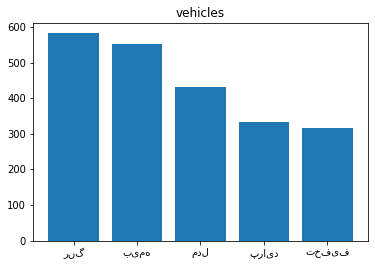

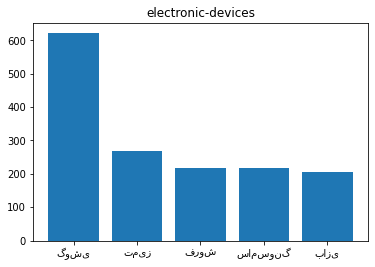

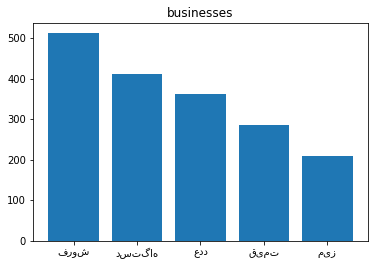

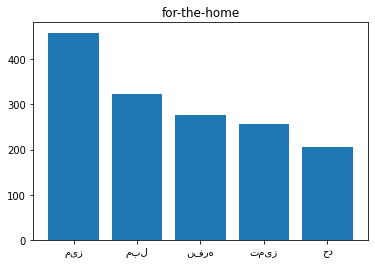

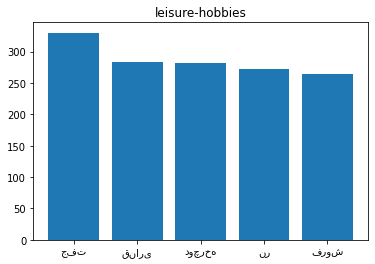

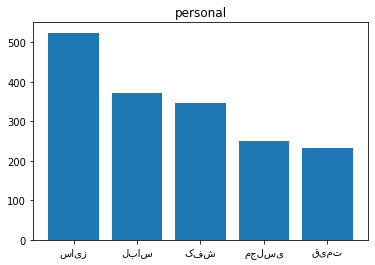

In [411]:
def plot_cat(category):
    sorted_cat = copy.deepcopy(words_dict_train[category])
    sorted_cat = dict(sorted(sorted_cat.items(), key = lambda x: x[1], reverse = True))

    keys = list(sorted_cat.keys())
    for i in range(5):
        if keys[i] in stop_words:
            sorted_cat.pop(sorted_cat[keys[i]])

    a = list(sorted_cat.items())
    a_keys = [x[0] for x in a[0:5]]
    a_vals = [x[1] for x in a[0:5]]
    
    plt.title(category)
    plt.bar(a_keys, a_vals)
    plt.show()

def plot_all_cats():
    for category in words_dict_train:
        plot_cat(category)

plot_all_cats()

<div dir="rtl">
    <h2 dir="rtl" style="color: #cf133e; font-weight: 600;">فاز سوم: ارزیابی</h2>
    <h5 style="line-height: 20pt;">۷)</h5>
    <h4 style="font-weight: 600;">چرا به هر دو مقدار precision و recall احتیاج داریم</h4>
    <h5 style="line-height: 20pt;">عموما در بررسی دقت طراحی تنها از precision یا recall استفاده نمی شود و هر دو را با هم استفاده می کنند. زیرا به سادگی می توان مدل را به گونه ای طراحی کرد که همه precision را با هزینه کم شدن recall افزایش بدهد یا بالعکس.</h5>
    <h4 style="font-weight: 600;">مثال اول: precision بالا و recall پایین</h4>
    <h5 style="line-height: 20pt;">می توانیم مدلی طراحی کنیم که از بین همه آگهی ها،تنها آگهی هایی که در آنها کلمه ٬پراید٬ استفاده شده است را پیدا کند و در دسته وسایل نقلیه قرار دهد. با توجه به نمودار های بخش قبل می دانیم احتمال اینکه این پیش بینی ها درست باشند(یعنی در آگهی کلمه پراید استفاده شده باشد و واقعا متعلق به دسته وسایل نقلیه باشد) بسیار بالاست و در نتیجه precision نزدیک به یک خواهد بود. در حالیکه ممکن است recall بسیار پایین باشد. چرا که در recall، false negative ها هم در نظر گرفته می شوند. یعنی آگهی هایی که در آنها کلمه پراید به کار نرفته بود و به همین علت به در دسته وسایل نقلیه قرار نگرفتند(که تعداد آنها کم نیست. مثل آگهی های مربوط به لوازم جانبی ماشین و مدل های دیگر ماشین) نیز در مخرج حضور می یابند. پس با precision به تنهایی مدل به نظر مدل خوبی می رسد در حالیکه دارد اشتباه عمل می کند. </h5>
    <h4 style="font-weight: 600;">مثال دوم: precision پایین و recall بالا</h4>
    <h5 style="line-height: 20pt;">می توانیم مدلی داشته باشیم که کل آگهی ها را جزو دسته وسایل نقلیه تشخیص دهد. در این صورت تعداد آگهی هایی که جزو وسایل نقلیه هستند و توسط مدل ما به اشتباه دسته بندی شده اند صفر خواهد بود و recall مدل ما یک می شود. در صورتی که ممکن است تعداد آگهی های زیادی باشند که جزو وسایل نقلیه نباشند و ما به اشتباه جزو وسایل نقلیه آنها را پیش بینی کرده باشیم. این مقادیر اشتباه پیش بینی شده در مخرج precision ظاهر می شوند و مقدار آن را به شدت کاهش می دهد. پس امکان دارد مقدار recall  به یک بسیار نزدیک باشد اما مدل ما درست کار نکند.</h5>
    <h5 style="line-height: 20pt;">۸)</h5>
    <h5 style="line-height: 20pt;">F1 از میانگین گیری harmonic استفاده می کند. دلیل استفاده از این نوع میانگین گیری در زیر آمده است:</h5>
    <h5 style="line-height: 20pt;">فرض کنیم می خواهیم میانگین سرعت ۳۰ کیلومتر بر ساعت و ۴۰ کیلومتر بر ساعت را بدانیم. این میانگین قطعا به صورت عادی محاسبه می شود و مقدار آن برابر با ۳۵ کیلومتر بر ساعت خواهد بود که از میانگین گیری عادی بدست می آید.</h5>
    <h5 style="line-height: 20pt;">حال فرض کنیم با یک ماشین مسافت ۱۰ کیلومتر را ابتدا با سرعت ۳۰ کیلومتر بر ساعت و سپس با سرعت ۴۰ کیلومتر بر ساعت طی می کنیم. در این صورت میانگین سرعت در این ۲۰ کیلومتر را دیگر نمی توانیم از میانگین گیری عادی استفاده کنیم و باید از میانگین گیری harmonic استفاده کنیم.  </h5>
    <h5 style="line-height: 20pt;">استفاده از میانگین گیری عادی در مورد دوم به این علت اشتباه است که برای اینکه میانگین گیری عادی پاسخ درستی به ما بدهد باید مقادیر  باید بر واحد یکسانی تقسیم شده باشند.(در واحد یکسانی قرار داشته باشند.) به عنوان مثال کیلومتر بر ساعت باید در بازه ساعات یکسان بررسی شود. برای پیدا کردن میانگین در فاصله یکسان در واحد کیلومتر، باید میانگین گیری روی ساعت بر کیلومتر(مقداری از ساعت که طول می کشد تا یک کیلومتر طی شود) انجام شوم که دقیقا کاری است که میانگین گیری harmonic انجام می دهد. </h5>
    <h5 style="line-height: 20pt;">به صورت مشابه، recall و precision هر دو صورت مشابهی دارند(true positives) در حالیکه مخرج آنها متفاوت است.(true positive+false negative, true positive+false positive). پس بهتر است که میانگین گیری روی عکس کسر آنها انجام شود. در واقع فرمول داده شده در صورت سوال، ساده شده فرمول زیر می باشد: که یعنی روی آنها میانگین گیری harmonic انجام شود. </h5>
    <img src="./images/hm_formula.png" />
    <h5 style="line-height: 20pt;">اگر n را در فرمول بالا در مخرج مخرج قرار بدهیم به سادگی مشخص است که این فرمول، همان میانگین گیری عادی روی معکوس کسر های داده شده است. </h5>
    <h5 style="line-height: 20pt;">۹)</h5>
    <h5 style="line-height: 20pt;">سه معیار نام برده شده برای بدست آوردن F1-score  برای کل مدل دسته بندی کننده در مواردی که بیشتر از دو کلاس داریم استفاده می شود.</h5>
    <h4 style="font-weight: 600;">Macro-F1</h4>
    <h5 style="line-height: 20pt;">میانگین معمولی بین F1-score کلاس های مختلف را نشان می دهد.</h5>
    <h4 style="font-weight: 600;">Weighted-F1</h4>
    <h5 style="line-height: 20pt;">میانگین وزن دار بین F1-score کلاس ها را نشان می دهد. به این صورت که  وزن هر کلاس برابر با تعداد تکرار آن در کل داده هایی که دسته بندی کردیم می باشد. در پایان مجمع ضرب وزن هر کلاس در F1-score آن تقسیم بر تعداد کل داده های دسته بندی شده می شود.</h5>
    <h4 style="font-weight: 600;">micro-F1</h4>
    <h5 style="line-height: 20pt;">برای پیدا کردن مقدار micro-F1 باید مقادیر microaveraged recall و microaveraged precision را بدست بیاوریم.</h5>
    <h5 style="line-height: 20pt;">microaveraged recall به این صورت بدست می آید که به جای اینکه تنها به داده های یک کلاس خاص نگاه کنیم، به داده های  کل کلاس ها و پیش بینی های کل کلاسها نگاه می کنیم. به این صورت که می بینیم به صورت کلی چند پیش بینی درست انجام داده ایم، و این مقدار را تقسیم بر تعداد همه پیش بینی های درست به اضافه همه پیش بینی های غلط می کنیم.</h5>
    <h5 style="line-height: 20pt;">microaveraged precision به این صورت بدست می آید که تعدا پیش بینی های درست را تقسیم بر مجموع تعداد پیش بینی های نادرست و درست برای هر کلاس می کنیم. مثلا اگر یک آگهی که در واقعیت وسیله نقلیه است در دسته شخصی قرار گرفته باشد، این پیش بینی یک false positive برای شخصی است و به تعداد پیش بینی های نادرست یکی اضافه می شود. در پایان مشخص است که این مقدار نیز برابر با تعداد کل پیش بینی های غلط می شود. </h5>
    <h5 style="line-height: 20pt;"> که مخارج microaveraged precision و microaveraged recall با هم یکی و برابر با مجموع پیش بینی های غلط و پیش بینی های درست است. این مقدار طبق تعریف با مقدار accuracy برابر است و مقدار micro-F1 نیز برابر با همین مقدار است.  </h5>
    <h5 style="line-height: 20pt;">۱۰)</h5>
    <h5 style="line-height: 20pt;"> با پیاده سازی توابع زیر، معیار ها را بدست می آوریم:  </h5>

</div>

In [427]:
def calc_accuracy(dict):
    print(dict['total_cor']/dict['total']*100)

def calc_precision(dict, precisions, idx):
    precisions[idx] = dict['tp'][idx]/(dict['tp'][idx]+dict['fp'][idx])
    print(precisions[idx])

def calc_recall(dict, recalls, idx):
    recalls[idx] = dict['tp'][idx]/(dict['tp'][idx]+dict['fn'][idx])
    print(recalls[idx])

def calc_F1(precisions, recalls, F1s, idx):
    F1s[idx] = 2*(precisions[idx]*recalls[idx]/(precisions[idx]+recalls[idx]))
    print(F1s[idx])
        
precisions, precisions_AS = [0]*6, [0]*6
recalls, recalls_AS = [0]*6, [0]*6
F1s, F1s_AS = [0]*6, [0]*6

def calc_calss_measurs(dict, precisions, recalls, F1s):
    for cat in words_dict_test:
        idx = list(words_dict_test.keys()).index(cat)
        print("     ", cat)
        print("         precision: ", end="")
        calc_precision(dict, precisions, idx)
        print("         recall: ", end="")
        calc_recall(dict, recalls, idx)
        print("         F1-score: ", end="")
        calc_F1(precisions, recalls, F1s, idx)


def calc_macroF1(F1s):
    print(sum(F1s)*100/6)

def calc_weightedF1(dict, F1s):
    F1s_w = copy.deepcopy(F1s)
    F1s_w = [x*(dict['tp'][i]+dict['fn'][i]) for i, x in enumerate(F1s_w)]
    print(sum(F1s_w)/dict['total'])

def calc_microF1(dict):
    print(sum(dict['tp'])/(sum(dict['tp'])+sum(dict['fp'])))

<div dir="rtl">
    <h4 style="font-weight: 600;"> نشان دادن نتایج</h4>
</div>

In [428]:
print("Measures before additive smoothing:")
calc_calss_measurs(probs, precisions, recalls, F1s)
print("\n")
print("Measures after additive smoothing:")
calc_calss_measurs(probs_AS, precisions_AS, recalls_AS, F1s_AS)

Measures before additive smoothing:
      vehicles
         precision: 0.9387755102040817
         recall: 0.15333333333333332
         F1-score: 0.26361031518624634
      electronic-devices
         precision: 0.8387096774193549
         recall: 0.08666666666666667
         F1-score: 0.15709969788519637
      businesses
         precision: 0.8064516129032258
         recall: 0.16666666666666666
         F1-score: 0.27624309392265195
      for-the-home
         precision: 0.8974358974358975
         recall: 0.23333333333333334
         F1-score: 0.3703703703703704
      leisure-hobbies
         precision: 0.19528178243774574
         recall: 0.9933333333333333
         F1-score: 0.3263964950711939
      personal
         precision: 0.8703703703703703
         recall: 0.15666666666666668
         F1-score: 0.2655367231638418


Measures after additive smoothing:
      vehicles
         precision: 0.9377162629757786
         recall: 0.9033333333333333
         F1-score: 0.9202037351443124

In [429]:
print("Accuracy before additive smoothing:")
calc_accuracy(probs)
print("Accuracy after additive smoothing:")
calc_accuracy(probs_AS)
print("\n")

print("Macro-F1 before additive smoothing:")
calc_macroF1(F1s)
print("Macro-F1 after additive smoothing:")
calc_macroF1(F1s_AS)
print("\n")

print("Weighted-F1 before additive smoothing:")
calc_weightedF1(probs, F1s)
print("Weighted-F1 after additive smoothing:")
calc_weightedF1(probs_AS, F1s_AS)
print("\n")

print("Micro-F1 before additive smoothing:")
calc_microF1(probs)
print("Micro-F1 after additive smoothing:")
calc_microF1(probs_AS)

Accuracy before additive smoothing:
29.833333333333336
Accuracy after additive smoothing:
85.16666666666667


Macro-F1 before additive smoothing:
27.65427825999168
Macro-F1 after additive smoothing:
85.33248080428247


Weighted-F1 before additive smoothing:
0.2765427825999168
Weighted-F1 after additive smoothing:
0.8533248080428245


Micro-F1 before additive smoothing:
0.29833333333333334
Micro-F1 after additive smoothing:
0.8516666666666667


<div dir="rtl">
    <h5 style="line-height: 20pt;">۱۱)</h5>
    <h4 style="font-weight: 600;">بررسی و تحلیل نتایج:</h4>
    <h5 style="line-height: 20pt;">همانطور که مشاهده می شود، استفاده از additive smoothing معیار های ارزیابی کلی(macro-F1, accuracy) را به شدت افزایش می دهد. همچنین معیار های ارزیابی مربوط به هر کلاس نیز تغییر می کنند. بیشترین این تغییرات در recall و F1-score مشاهده می شوند که منطقی است. چراکه recall معیاری است که میزان نزدیکی مدل ما به واقعیت را می سنجد و از آنجایی که additive smoothing مدل را به واقعیت نزدیکتر می کند، recall افزایش خوبی دارد. F1-score هم به recall وابسته است و با افزایش آن افزایش می یابد(با توجه به اینکه precision تغییر زیادی نداشته.). اما precision تغییر چشمگیری نکرده و بعضی وقت ها کمتر هم شده. دلیل این اتفاق را می توان همان مثال بیان شده در سوال هفت بیان کرد. precision نسبت درست ها در پیش بینی های خودمان را می سنجد و کاری به آگهی هایی که به صورت اشتباه دسته بندی شده اند ندارد. این حرکت ممکن است precision را افزایش بدهد، اما recall را کاهش می دهد.</h5>
    <h5 style="line-height: 20pt;">همانطور که مشخص است، همانطور که انتظار داشتیم micro-F1 و accuracy با هم برابر هستند.</h5>
    <h4 style="font-weight: 600;">بررسی های مربوط به اجرا های متوالی</h4>
    <h5 style="line-height: 20pt;">برخی از نرمالسازی ها میزان accuracy و F1 را کاهش می دادند که بخش نرمالسازی کامنت شده اند.</h5>
    <h5 style="line-height: 20pt;">حذف کلمات بدست آمده در بخش بررسی صحت باعث افزایش accuracy و F1 شد.</h5>
</div>

<div dir="rtl">
    <h5 style="line-height: 20pt;">۱۲)</h5>
    <img src="./images/mismatch.png" />
    <h5 style="line-height: 20pt;">در برخی موارد مانند مورد اول، اگر توکن ها را به جای monogram به bigram تغییر می دادیم، ممکن بود نتیجه بهتری بگیریم. چراکه با بررسی داده ها متوجه می شویم کلمه دوربین بیشتر در بخش leisure-hobbies امده است. در حالیکه منظور از بیشتر این دوربین ها دوربین عکاسی بوده و نه دوربین تک چشم و به همین علت این آگهی اشتباه دسته بندی شده است.</h5>
    <h5 style="line-height: 20pt;">در بقیه آگهی ها بخش زیادی از خطای رخ داده به این علت است که کلماتی که به صورت کلی به کلاس خاصی اشاره نمی کردند در محاسبات ما برای تشخیص کلاس دخیل بوده اند. به عنوان مثال کلمه ٬عمده٬ در کلاس businesses تکرار زیادی داشته است که باعث شده است مورد سوم از mismatch ها اتفاق بیوفتد. در حالیکه این شاید احتمال اینکه آگهی ای که کلمه ٬عمده٬ در خود دارد به دسته businesses تعلق داشته باشد به صورت شهودی هم بیشتر باشد، اما این احتمال نباید به حدی زیاد شود که اطلاعاتی مانند اینکه کلمه ٬تزیینی٬ تقریبا همیشه متعلق به دسته for-the-home است نادیده گرفته شود. در برای جلوگیری از این اتفاق می توانیم یا مانند بخش پلاتها، کلمات پرتکرار بیشتری را در نظر بگیریم یا به آنها وزن کمتری اختصاص بدهیم.  </h5>
    <h5 style="line-height: 20pt;">به صورت کلی کلمات زیادی می توانند در آگهی ها وجود داشته باشند که به دسته خاصی اشاره نکنند و به تصادف در یکی از دسته ها تکرار بیشتری در یک کلاس داشته باشند. کلماتی مانند ٬درجه یک٬، ٬شیک٬ و ٬مدل٬ و .... ما در مدل خود بسیاری از این کلمات را حذف نکردیم که در مواردی منجر به تشخیص های اشتباه شد. در برخی موارد نیز، واژه های انگلیسی یا اعداد به توضیحات چسبیده بودند که در صورت جدا شدن و تشخیص درست کلمه اصلی،‌ مدل ما بهتر خواهد شد.</h5>
</div>

<div dir="rtl">
    <h2  dir="rtl" style="color: #cf133e; font-weight: 600;">نتیجه گیری:</h2>
    <h5>در این پروژه با استفاده از naive bayes توانستیم یک مساله دسته بندی را حل کنیم و تاثیر شیوه های مختلف پیش پردازش را بر میزان دقت مدل خود یاد گرفتیم.</h5>
    <h5 style="line-height: 20pt;">در این پروژه یاد گرفتیم که با استفاده از naive bayes می توان مسائل دسته بندی را حل کرد و تاثیر شیوه های مختلف پیش پردازش را بر و محاسبه احتمال را بر میزان دقت مدل خود دیدیم. می توان نتیجه گیری کرد که شیوه additive smoothing شیوه بسیار مناسبتری نسبت به محاسبه احتمال بیزی به صورت عادی است و همچنین پیش پردازش با دید درست به داده ها می تواند تاثیر به سزایی در دقت مدل داشته باشد.</h5>
</div>

<div dir="rtl">
    <h2  dir="rtl" style="color: #cf133e; font-weight: 600;">پیشنهادات:</h2>
    <h5>پیشنهادی ندارم. همه چیز عالی بود.</h5>
</div>

<h3 style="color: #2b9978; font-weight: 600;">Resources:</h3>
<pre>
Stemming and Lemmatization: https://www.youtube.com/watch?v=JpxCt3kvbLk
Bag of Words: https://www.youtube.com/watch?v=IKgBLTeQQL8&t=31s
Stemming vs Lemmatization: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221
Posterior probability: https://www.investopedia.com/terms/p/posterior-probability.asp
Prior probability: https://www.investopedia.com/terms/p/posterior-probability.asp
evidence: https://stats.stackexchange.com/questions/450865/in-bayesian-inference-why-is-pd-sometimes-called-the-evidence
accuracy, precision, recall, F1: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=video&cd=&cad=rja&uact=8&ved=2ahUKEwiY1-6nzLn0AhUXiv0HHaVSDuUQtwJ6BAgJEAI&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D2osIZ-dSPGE&usg=AOvVaw3GAjY3_n_OCi9s1vBTCta2
F1: https://en.wikipedia.org/wiki/Harmonic_mean
resources mentioned in report
</pre>